# Networking for Big Data - Assigment #1
# Faranak Alikhah - Mehrdad Hassanzadeh - Behdad Ahmadi- Braulio Villalobos

#### Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1st Part 

#### Generation of ER Graphs

In [2]:
def er_graph_f(num_nodes, prob,show_graph = True):
    '''
    Creating the ER Graph by using the networkx library.
    num_nodes corresponds to the total number of nodes the ER graph contains.
    prob corresponds to the probability that each edge is included in the graph independently 
    from every other edge.
    '''
    G= nx.erdos_renyi_graph(num_nodes,prob)
    
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    return G

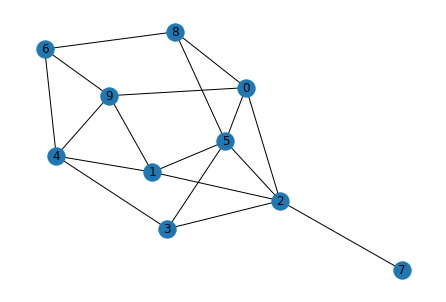

In [19]:
innn = er_graph_f(10,0.5)

#### Generation of r-regular random graph

In [21]:
def rr_graph_f(d,n,seed_par = None,show_graph=True):
    '''
    Creation of the Random Regular Graphs
    d corresponds to the degree of each node
    n corresponds to the number of nodes (n x d must ve even)
    seed corresponds to the indicator of the random number generation
    '''
    
    G = nx.random_regular_graph(d, n, seed=seed_par)
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    return G

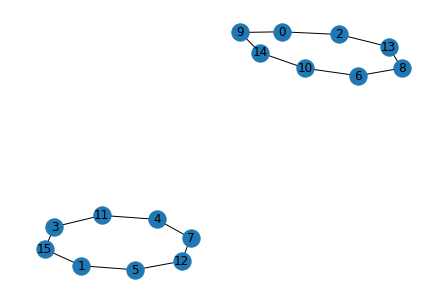

In [66]:
z = rr_graph_f(2, 16)

## Check Connectivity

### Implementation of Breadth-First-Search Algorithm 

In [72]:
def Check_connectivity_BFS(Graph):
    Nodes = list(nx.nodes(Graph))
    visited = set()
    BFS_queue = [Nodes[0]]
    while BFS_queue: 
        Target_node = BFS_queue.pop(0)
        if Target_node not in visited: 
            visited.add(Target_node)
            BFS_queue += list(nx.neighbors(Graph, Target_node))
    return True if len(visited) == len(list(nx.nodes(Graph))) else False 

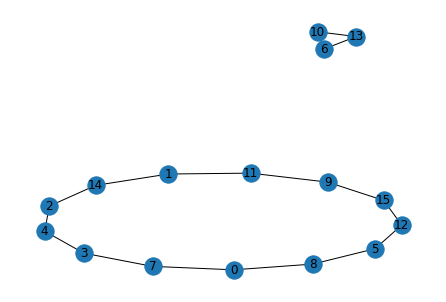

The graph is not connected!!!


In [75]:
Result = Check_connectivity_BFS(rr_graph_f(2, 16, seed_par = 4))
print("The graph is connected!!!" if Result else "The graph is not connected!!!")

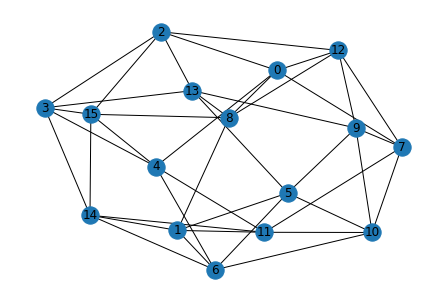

The graph is connected!!!


In [76]:
Result = Check_connectivity_BFS(rr_graph_f(5, 16, seed_par = 4))
print("The graph is connected!!!" if Result else "The graph is not connected!!!")

### Irreducibility

__Note: We are not sure about this__<br><br>
But as far as we know, this function approach will only work when we have a strongly connected network. Otherwise we can not find out if the graph is connected or not.<br><br>
__Irreducibility implies that the graph is connected, while reducibility doesn't imply not connectivity.__

In [119]:
def Check_irreducibility(Graph): 
    Num_of_nodes = nx.number_of_nodes(Graph) # To get the number of the nodes in the given graph 
    Result = np.identity(Num_of_nodes) # To build the identity matrix in the same size of the graph 
    Adjacency_matrix = nx.to_numpy_array(Graph) # To have the adjacency matrix of the given graph 
    
    Result += Adjacency_matrix # Temporary result of I + A
    for i in range(Size - 2): # Range to A^n-1
        Adjacency_matrix *= Adjacency_matrix
        Result += Adjacency_matrix
    return False if (Result == 0).any() else True

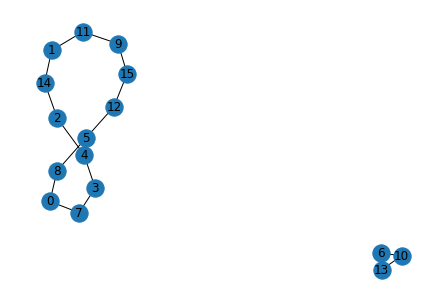

Our graph is: Reducible


In [127]:
Graph_reducible = rr_graph_f(2, 16, seed_par = 4)
print("Our graph is:", "Reducible" if Check_irreducibility(Graph_reducible) == False else "Irreducible")

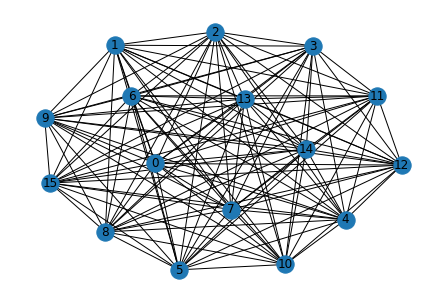

Our graph is: Irreducible


In [134]:
Graph_reducible = rr_graph_f(15, 16)
print("Our graph is:", "Reducible" if Check_irreducibility(Graph_reducible) == False else "Irreducible")

### Eigenvalue of the Laplacian Matrix

We define the Laplacian of a graph as a $n x n$ matrix, which is defined as follows:

* $L_{ii}$ = $d_i$, where $d_i$ is the degree of node $i$
* $L_{ij}$ = -1, if and only if $(i,j) \in A$

We can also get the Laplacian Matrix through the following: 

$L = D - A$

Where
* $D$ is the degree matrix
* $A$ is the adjacency matrix

In [71]:
def adj_matrix_f(G):
    '''
    Uses networkx library to retrieve the Adjacency Matrix of a given graph G.
    '''
    node_list = sorted([x for x in G.nodes()])
    #return(nx.to_numpy_matrix(G,nodelist= node_list))
    return(nx.adjacency_matrix(G, nodelist=node_list))

In [62]:
def degree_matrix(adj_matrix):
    '''
    Given the adjacency matrix of a graph, it retrieves the degree matrix which has in its diagonal
    the total number of edges for each node in the given adjacency matrix. 
    '''
    dim = np.zeros([adj_matrix.shape[0], adj_matrix.shape[0]]) 
    rows, cols = adj_matrix.nonzero()
    for row, col in zip(rows, cols):
        dim[row, row] += 1
    return dim

In [72]:
A = adj_matrix_f(z)
D = degree_matrix(A)
L = D - A

In [73]:
L

matrix([[ 3.,  0.,  0., -1., -1., -1.],
        [ 0.,  3., -1.,  0., -1., -1.],
        [ 0., -1.,  3., -1., -1.,  0.],
        [-1.,  0., -1.,  3.,  0., -1.],
        [-1., -1., -1.,  0.,  3.,  0.],
        [-1., -1.,  0., -1.,  0.,  3.]])

In [66]:
node_list = sorted([x for x in z.nodes()])
xxx = nx.laplacian_matrix(z, nodelist=node_list)

In [67]:
print(xxx.todense())

[[ 3  0  0 -1 -1 -1]
 [ 0  3 -1  0 -1 -1]
 [ 0 -1  3 -1 -1  0]
 [-1  0 -1  3  0 -1]
 [-1 -1 -1  0  3  0]
 [-1 -1  0 -1  0  3]]


In [ ]:
#Backup

In [ ]:
'''
Adjacency Matrix can also be retrieved with the following
'''

#ttt = nx.adjacency_matrix(z)
#print(ttt.todense())